In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class AR:
    def __init__(self, *args, epsilon, Y0):
        self.phi = np.array(args)
        self.epsilon = epsilon
        self.Y0 = np.array(Y0)
        self.memory = np.array([])
        self.YPast = np.array(self.Y0)
    def simulate_nPeriods(self, n=1):
        simulate_nPeriods(self, n)
    
    #def clear_memory(self):
    #    self.memory = np.array([])
    
    def statistics(self):
        return statistics(self)
    
    def plot(self):
        plot(self)
    
    def save(self, file_name):
        save(self, file_name)

# helpers  fuctions

def simulate_onePeriod(ar, eps):
    y_onePeriod_ahead = ar.phi@ar.YPast + eps
    ar.YPast = np.append(y_onePeriod_ahead, ar.YPast[:-1])
    ar.memory = np.append(ar.memory, y_onePeriod_ahead)

def simulate_nPeriods(ar, n):
    eps = ar.epsilon(n)
    for i in range(n):
        simulate_onePeriod(ar, eps[i])

def statistics(ar):
    mu_val = np.mean(ar.memory)
    sigma_val = np.std(ar.memory)
    corr_val = np.corrcoef(ar.memory[1:], ar.memory[:-1])[0,1]
    return f"平均數:{mu_val:.4f}, 變異數:{sigma_val:.4f}, 相關係數:{corr_val:.4f}"

def plot(ar):
    plt.style.use('ggplot')
    plt.plot(ar.memory)
    plt.title("AR(1) process")
    plt.xlabel("preiod")
    plt.ylabel("y")
    plt.show()

def save(ar, file_name):
    df = pd.DataFrame(ar.memory)
    if file_name.endswith('.xlsx'):
        df.to_excel(file_name, index=False)
    elif file_name.endswith('.txt'):
        df.to_csv(file_name, index=False, sep='\t')
    elif file_name.endswith('.csv'):
        df.to_csv(file_name, index=False)
    else:
        raise ValueError("file_name must end with .xlsx or .txt or .csv")

# Path: final_project.ipynb
# 1.1
#ar = AR(0.5, epsilon=lambda n: np.random.normal(0, 1, n), Y0=0)
#ar.simulate_nPeriods(100)
#ar.plot()
#print(ar.statistics())


In [ ]:
import pandas as pd



In [18]:
def Epsilon(mu, sigma):
    def draw(size):
        return np.random.normal(mu, sigma, size)
    return draw


epsilon = Epsilon(0, 0.4)

In [20]:
ar = AR(0.8, -0.35, epsilon=epsilon, Y0=[0,0])
ar.simulate_nPeriods(10)
print(ar.YPast)
print(ar.memory)

[1.03546799 0.86049473]
[-0.30261925 -0.05644688 -0.15077125 -0.16221175  0.34311616  0.58583692
  0.35508689  0.23373496  0.86049473  1.03546799]


In [21]:
ar.statistics()

'平均數:0.2742, 變異數:0.4297, 相關係數:0.7515'

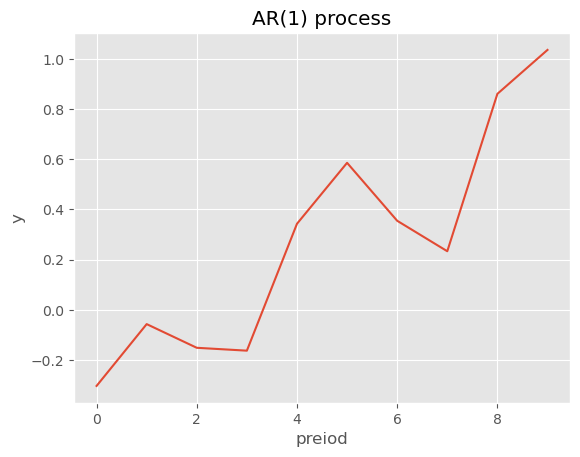

In [22]:
ar.plot()

In [23]:
ar.save('test.xlsx')
ar.save('test2.txt')
ar.save('test3.csv')

In [5]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(1, len(ar.memory)+1), y=ar.memory))

- MA (Moving average) model
    - `mu` 是ＭＡ模型的平均值
    - `theta` 是ＭＡ模型的係數，使用者可以自行設定 
    - `epsilon` 是ＭＡ模型的隨機誤差項，透過helper function 中`np.random.normal`產生白噪音 $ N(0,\sigma^2)$  
$$ X_t = \mu +\epsilon_t +\sum_{i}^{q} \theta_{i}\epsilon_{t-i}$$

- 統計量
  - 平均數
$$ E(X_t) = E(\mu +\epsilon_t +\sum_{i}^{q} \theta_{i}\epsilon_{t-i})$$
可以推導出 $ E(X_t) = \mu $ 
  - 變異數
$$ Var(X_t) = Var(\mu +\epsilon_t +\sum_{i}^{q} \theta_{i}\epsilon_{t-i})$$
可以推導出 $ Var(X_t) = \sigma^2(1+\sum_{i}^{q} \theta_{i}^2) $ 


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class MA:
    def __init__(self, q, theta , mu, sigma):
        self.q = q  # MA model order
        self.theta = np.array(theta)  # MA coefficients
        self.mu = mu  # Mean of the series
        self.sigma = sigma  # Standard deviation of the noise
        self.memory = np.zeros(q)  # Initialize memory to store past noise values
    def simulateOnePreiod(self, n=1):
        """
        預設參數為模擬一期，可以自行設定調用模擬期數
        """
        return simulate(self, n)
 
    def plot(self):
        plot(self, self.q) 


#################### helpers  fuctions ####################
def simulate(ma, n=1):
    # Simulate n periods of the MA process
    noise = np.random.normal(0, ma.sigma, n + ma.q)  # Generate noise terms
    X = np.zeros(n)
    for t in range(n):
        X[t] = ma.mu + noise[t + ma.q]  # Current noise term
        for i in range(ma.q):
            X[t] += ma.theta[i] * noise[t + ma.q - i - 1]  # Past noise terms
            ma.memory = np.append(ma.memory, X[t])  # Update memory with new value
    return X

def plot(ma, q):
    plt.style.use('ggplot')
    plt.figure(figsize=(10, 4))
    plt.plot(ma.memory, marker='o')
    plt.title(f"MA({q}) Process")  
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.show()


In [16]:

# Example usage:
# Create an MA(2) model with specific parameters
ma = MA(q=3, theta=[0.5, -0.3], mu=0, sigma=1)
ma.simulateOnePreiod(100)
ma.memory
ma.plot()

IndexError: index 2 is out of bounds for axis 0 with size 2

In [7]:
ma.plot()

TypeError: plot() missing 1 required positional argument: 'q'

In [27]:
ma.simulateOnePreiod(10)

array([-0.367981  , -0.53162418,  0.18418874,  0.92362758, -0.24850906,
       -0.08678272,  1.02255162, -1.23208507, -1.62416466, -1.11611416])

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
### ma 是一個白雜訊序列 N(0,sigma^2) ###
class MA:
    def __init__(self, q, theta, mu, sigma):
        self.q = q  # MA model order
        self.theta = np.array(theta)  # MA coefficients
        self.mu = mu  # Mean of the series
        self.sigma = sigma  # Standard deviation of the noise
        self.memory = np.zeros(q)  # Initialize memory to store past noise values

    def simulate(self, n=1):
        # Simulate n periods of the MA process
        noise = np.random.normal(0, self.sigma, n + self.q)  # Generate noise terms
        X = np.zeros(n)
        for t in range(n):
            X[t] = self.mu + noise[t + self.q]  # Current noise term
            for i in range(self.q):
                X[t] += self.theta[i] * noise[t + self.q - i - 1]  # Past noise terms
            self.memory = np.append(self.memory, X[t])  # Update memory with new value
        return X

    def plot(self):
        plt.figure(figsize=(10, 4))
        plt.plot(self.memory, marker='o')
        plt.title("MA(q) Process")
        plt.xlabel("Time")
        plt.ylabel("Value")
        plt.show()


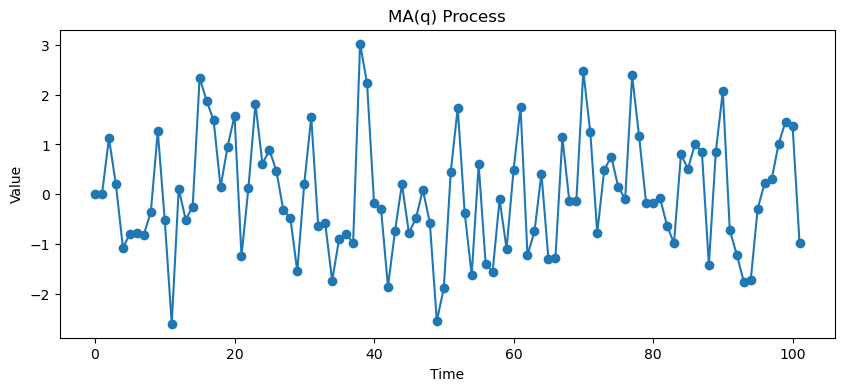

array([ 0.45155865, -0.41633627, -0.92993527,  1.72613725,  2.23916764,
       -0.63869937, -0.32223538,  0.14265218,  1.14178874,  0.80237555,
       -1.07317309, -0.20488167, -0.14451375, -1.34636993,  0.20327485,
        1.17785838, -0.49104186, -1.28479883, -2.13599302,  0.98570908,
        0.71995652, -0.60214726,  1.68475574,  0.40161166,  0.78410442,
        2.61402646,  0.73877168, -0.4775371 , -0.19662906, -1.36545293,
       -1.9500939 , -0.98942433,  0.06621831, -1.45195574,  0.25052088,
        2.21847891,  0.2417522 ,  0.12060863,  0.25109627, -1.48261299,
       -1.2493884 , -0.0143242 , -0.94740129,  0.0402935 , -0.86805668,
       -1.97021443, -1.14256948, -0.08970289,  0.21738513,  1.26180239,
        1.03590236, -0.91217951, -0.58380566,  1.1718334 , -0.07970595,
        1.21205184,  1.97142838,  1.15700651, -0.66714629, -1.77986849,
       -0.14888274, -1.8058345 ,  0.14649397,  0.52913856,  1.55827636,
        0.43213034, -1.47790146,  0.27774693, -1.93898913,  0.13

In [5]:

# Example usage:
# Create an MA(2) model with specific parameters
ma_model = MA(q=2, theta=[0.5, -0.3], mu=0, sigma=1)
ma_model.simulate(n=100)
ma_model.plot()
MA(q=2, theta=[0.5, -0.3], mu=0, sigma=1).simulate(n=100)